In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy.stats import linregress

file1 = "Crime_Data/district_crime.csv"
file2 = "Zillow/Zillow_Home_Value_Index_2019_August.csv"

crime_data = pd.read_csv(file1)
hvi_data = pd.read_csv(file2)


In [2]:
crime_grouped = crime_data.groupby('district')
total_crime = crime_grouped.sum()
total_crime

,count
district,
Downtown,245
North,379
Northeast,327
Northwest,245
Southeast,445
Southwest,273


In [3]:
del hvi_data["Unnamed: 3"]
del hvi_data["Unnamed: 4"]
del hvi_data["Unnamed: 5"]
hvi_data.columns

Index(['Region', 'Median Home Value', 'No. Homes'], dtype='object')

In [4]:
hvi_data = hvi_data.rename(columns={'Region':'district'})
hvi_data

,district,Median Home Value,No. Homes
0,North,"$340,157","22,357"
1,Northwest,"$408,116","20,929"
2,Northeast,"$229,515","9,429"
3,Southeast,"$218,866","5,000"
4,Downtown,"$406,902","10,214"
5,Southwest,"$497,774","17,357"
6,NaN,NaN,NaN


In [5]:
merge = pd.merge(total_crime,hvi_data,on='district')
merge

,district,count,Median Home Value,No. Homes
0,Downtown,245,"$406,902","10,214"
1,North,379,"$340,157","22,357"
2,Northeast,327,"$229,515","9,429"
3,Northwest,245,"$408,116","20,929"
4,Southeast,445,"$218,866","5,000"
5,Southwest,273,"$497,774","17,357"


In [6]:
merge['Median Home Value']=merge['Median Home Value'].replace('[\$,]', '', regex=True).astype(float)
merge

,district,count,Median Home Value,No. Homes
0,Downtown,245,406902.0,"10,214"
1,North,379,340157.0,"22,357"
2,Northeast,327,229515.0,"9,429"
3,Northwest,245,408116.0,"20,929"
4,Southeast,445,218866.0,"5,000"
5,Southwest,273,497774.0,"17,357"


In [13]:
x_axis = merge['Median Home Value']
y_axis = merge['count']

(slope, intercept, r_val, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

-0.7531558485713237

In [15]:
r_sqd=r_val*r_val
r_sqd

0.5672437322371906

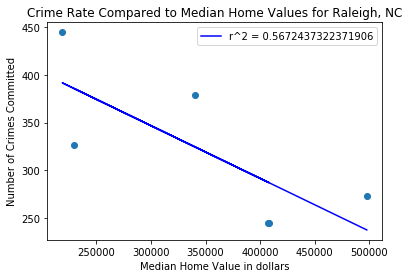

In [19]:
fig, ax = plt.subplots()

ax.set_xlabel("Median Home Value in dollars")
ax.set_ylabel("Number of Crimes Committed")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, c='b',label=f"r^2 = {r_sqd}")

ax.set_title("Crime Rate Compared to Median Home Values for Raleigh, NC")
ax.legend(loc='best')

plt.savefig("CrimeVsHVI.png")
plt.show()